
Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  int64  
 1   region                  10000 non-null  object 
 2   energy_consumption_kwh  10000 non-null  float64
 3   peak_hours_usage        10000 non-null  float64
 4   off_peak_usage          10000 non-null  float64
 5   renewable_energy_pct    10000 non-null  float64
 6   billing_amount          10000 non-null  float64
 7   household_size          10000 non-null  int64  
 8   temperature_avg         10000 non-null  float64
 9   income_bracket          10000 non-null  object 
 10  smart_meter_installed   10000 non-null  bool   
 11  time_of_day_pricing     10000 non-null  bool   
 12  annual_energy_trend     10000 non-null  float64
 13  solar_panel             10000 non-null  bool   
 14  target_high_usage  

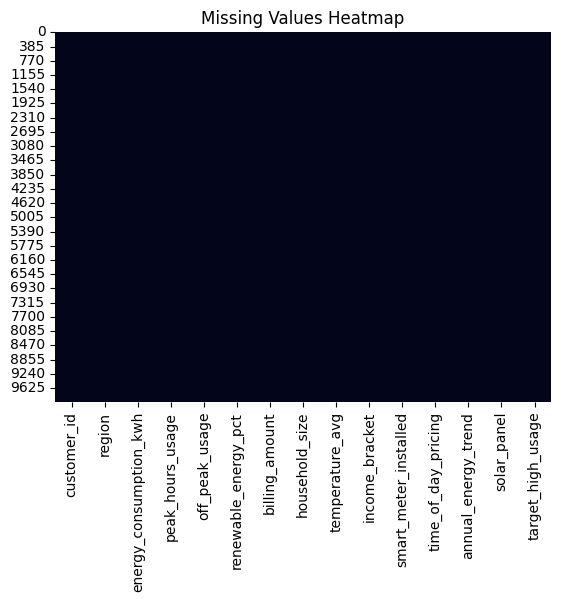

<Figure size 2000x1500 with 0 Axes>

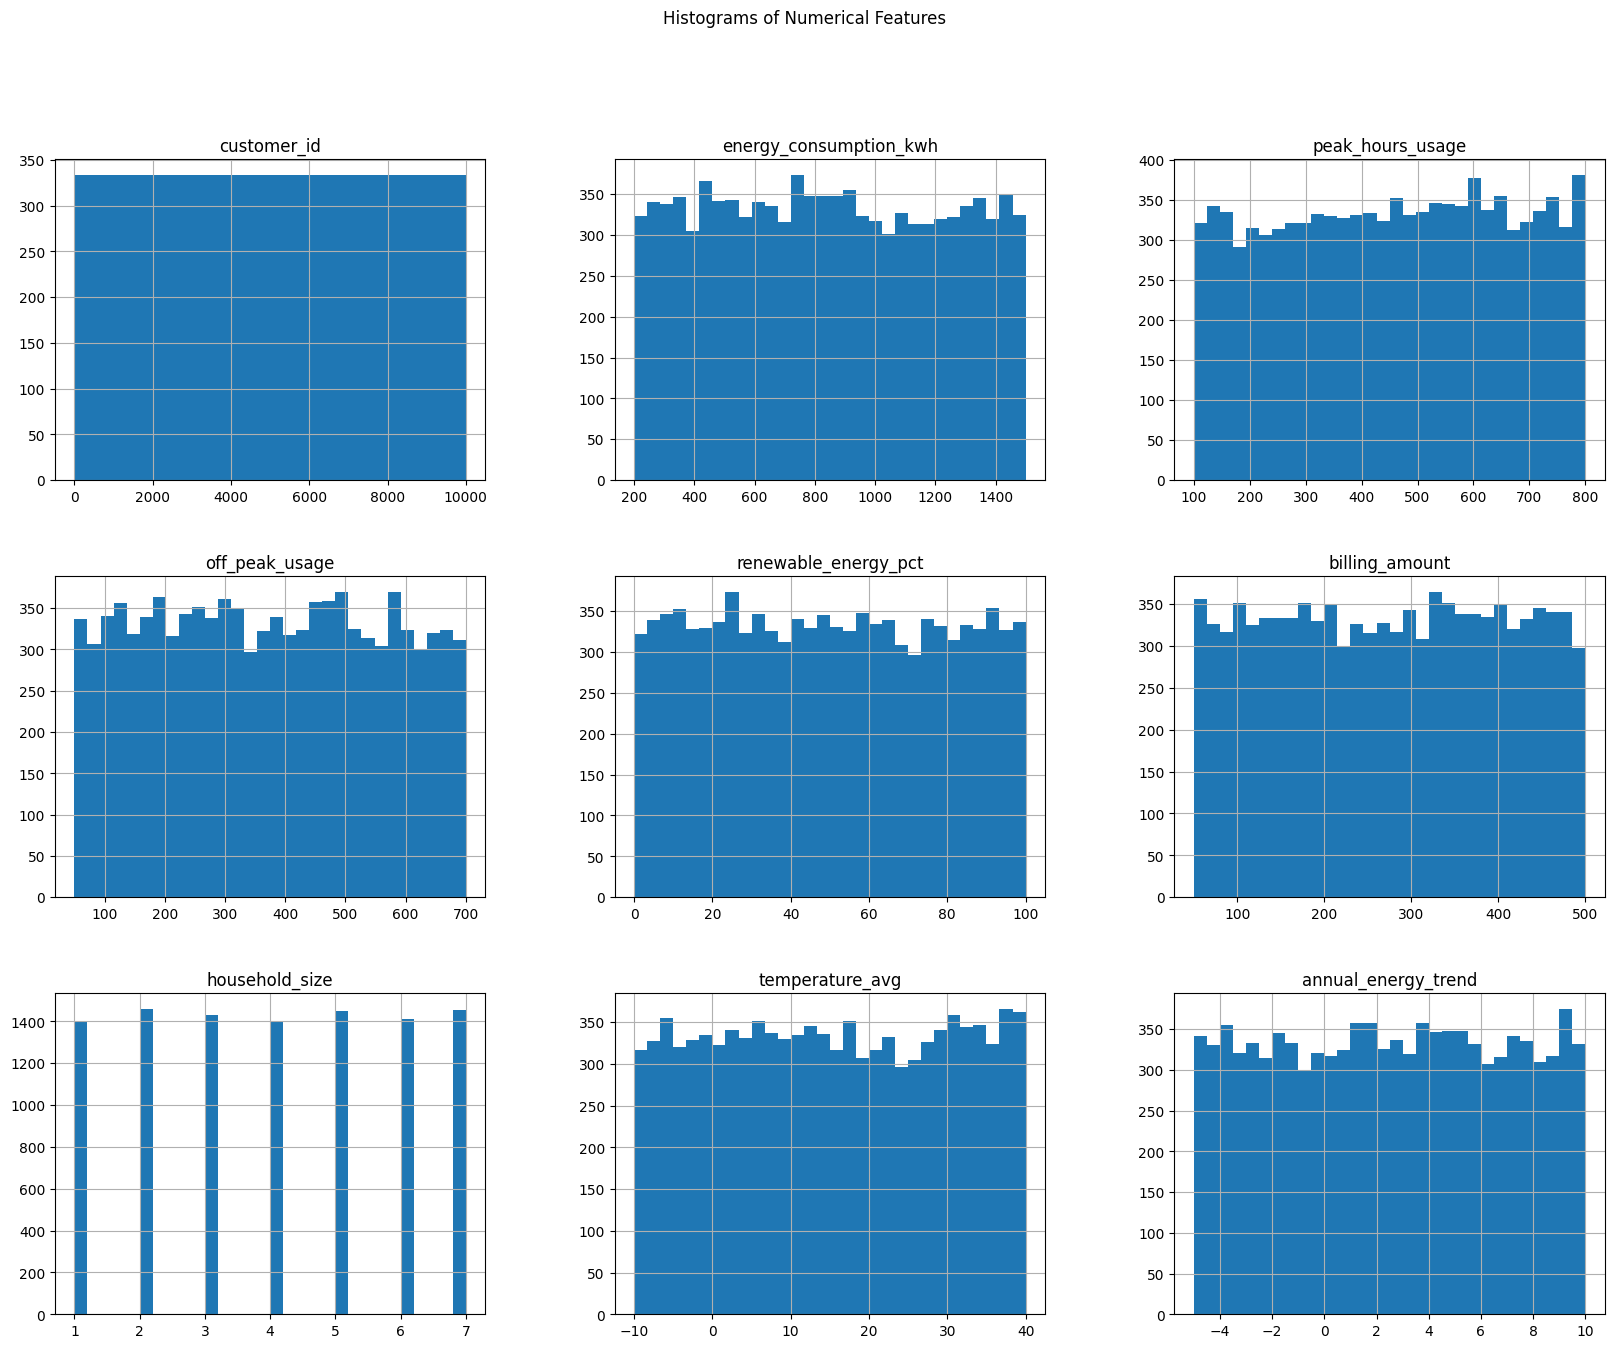

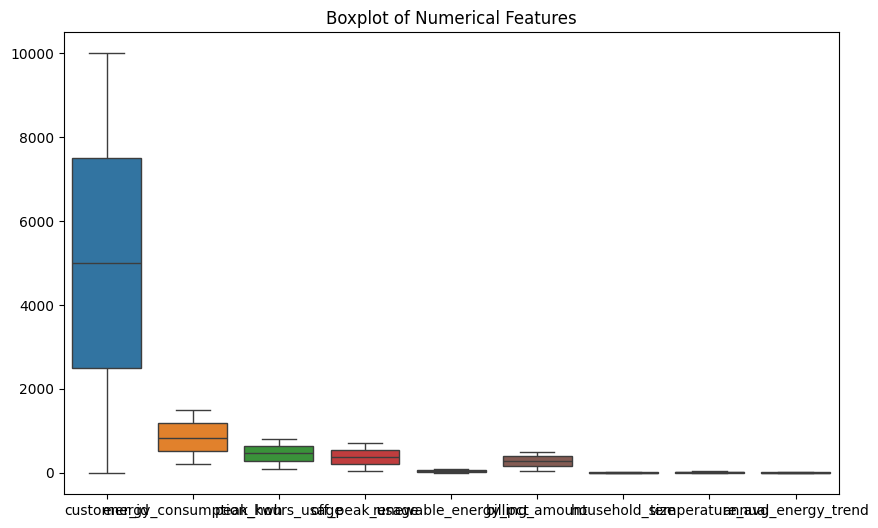

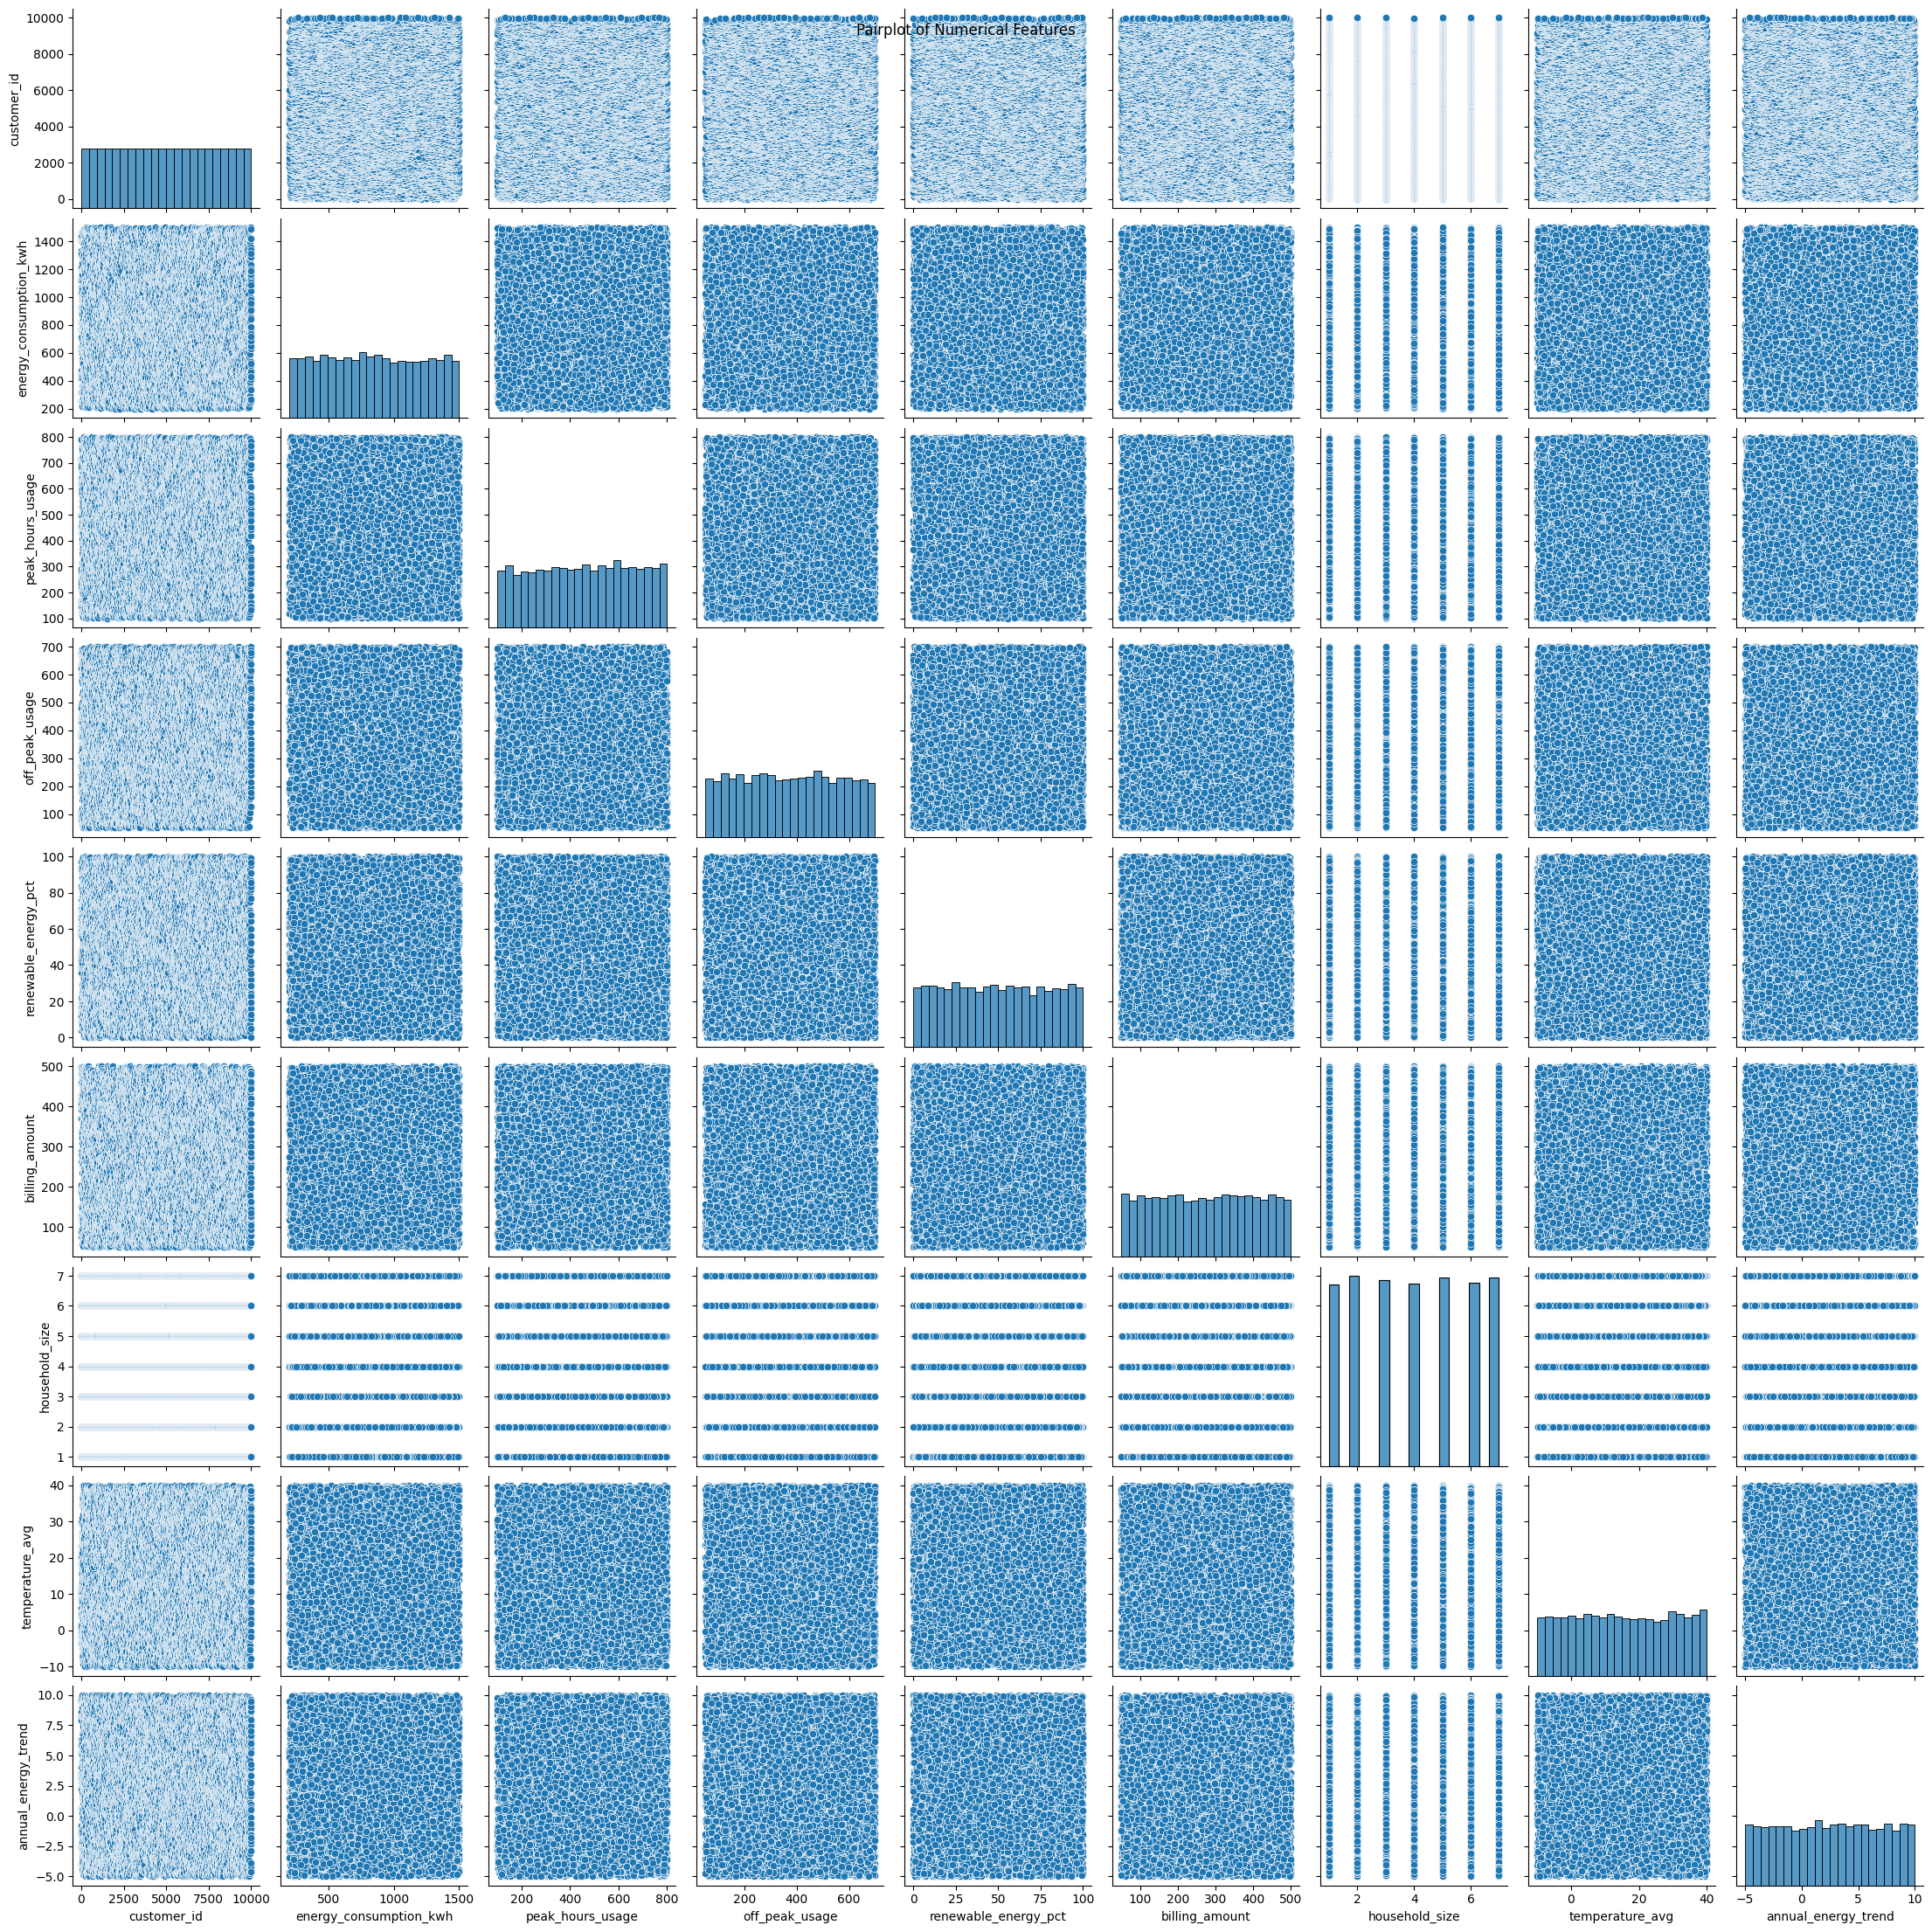

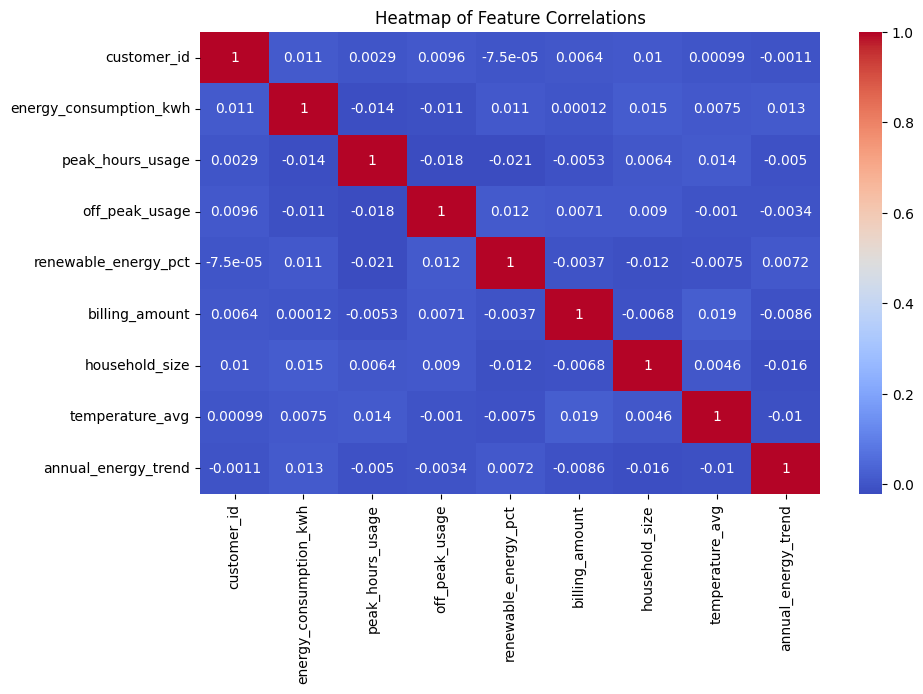

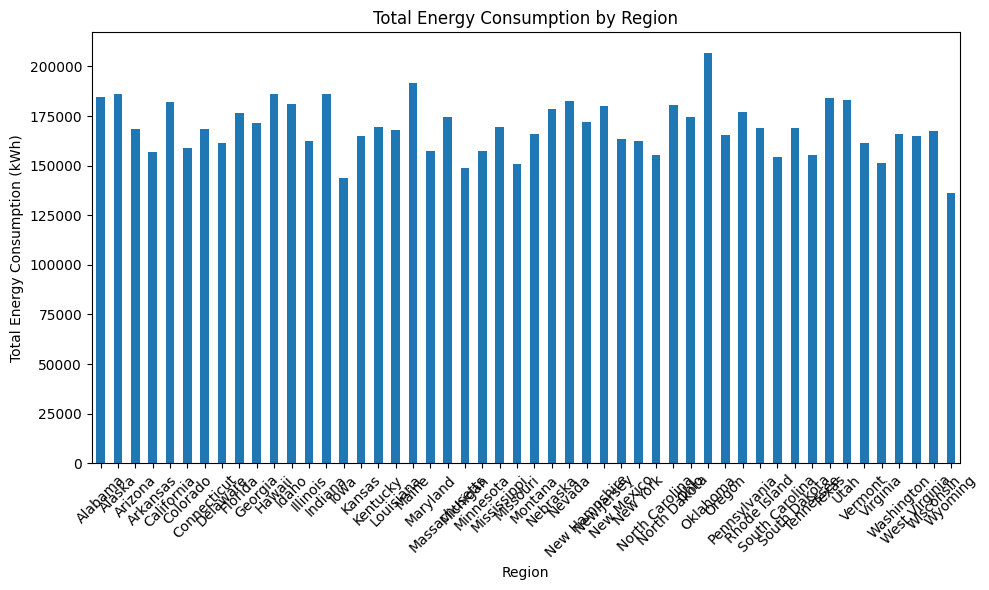

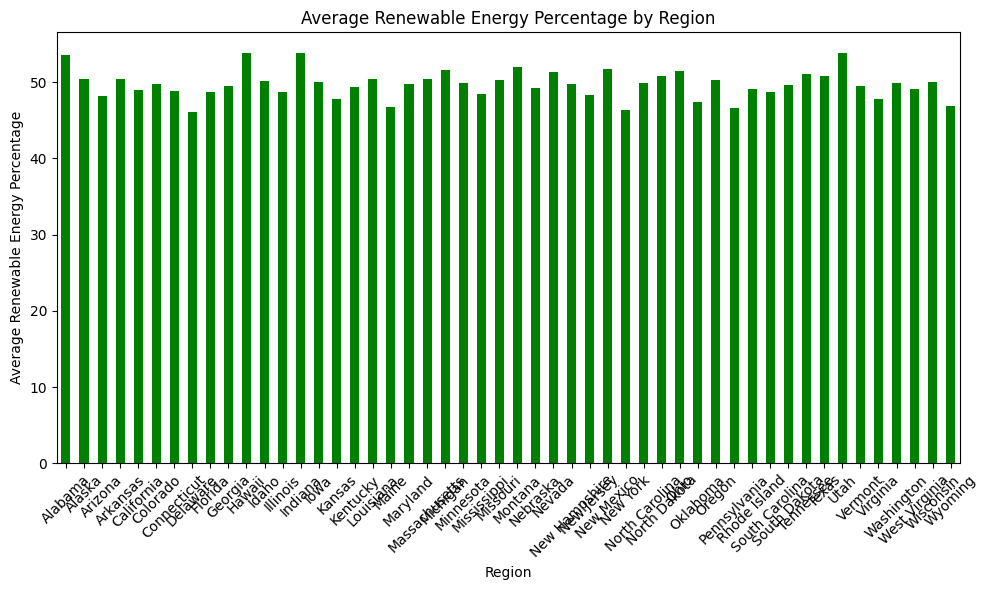

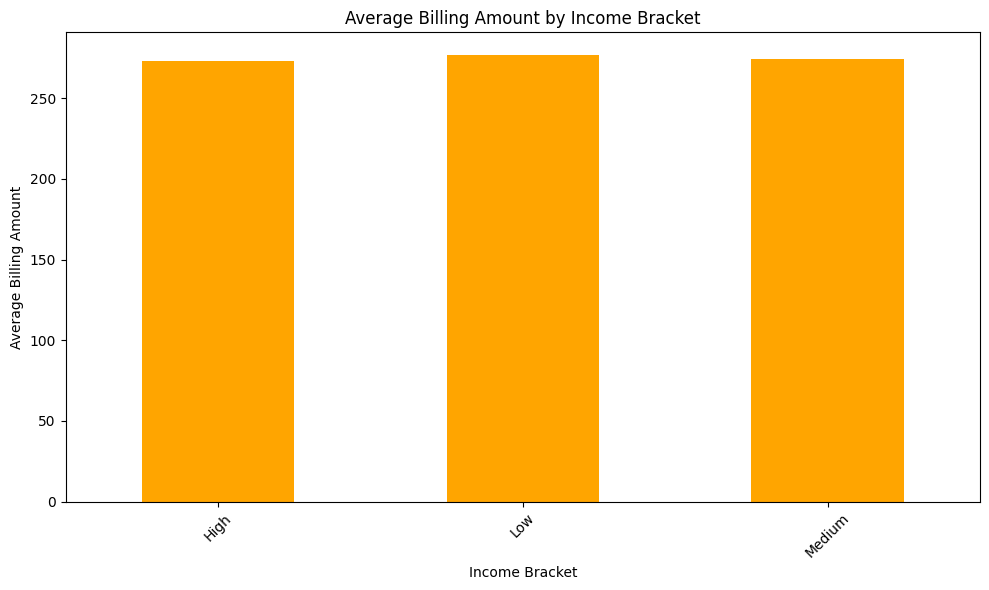

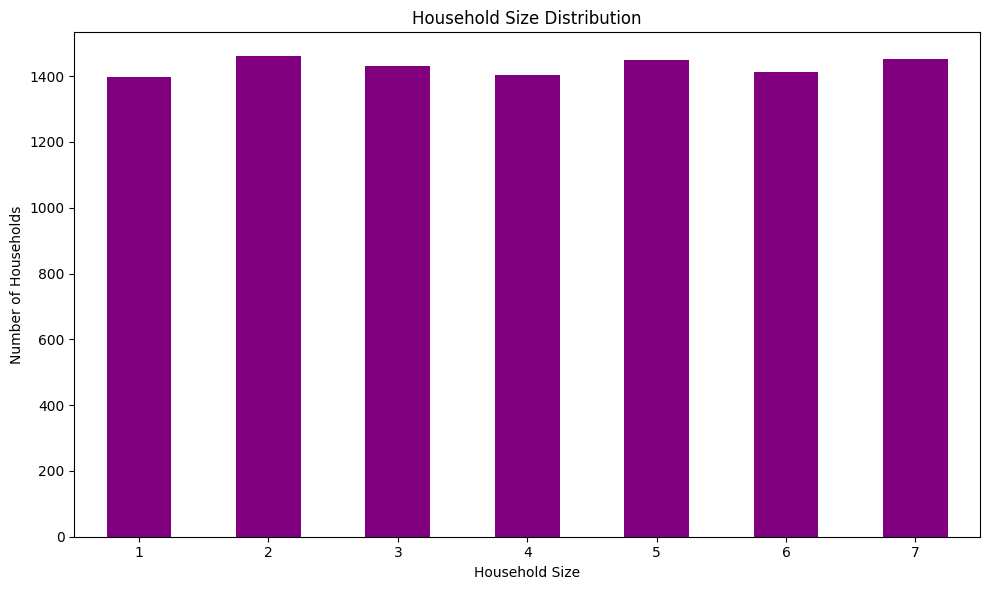

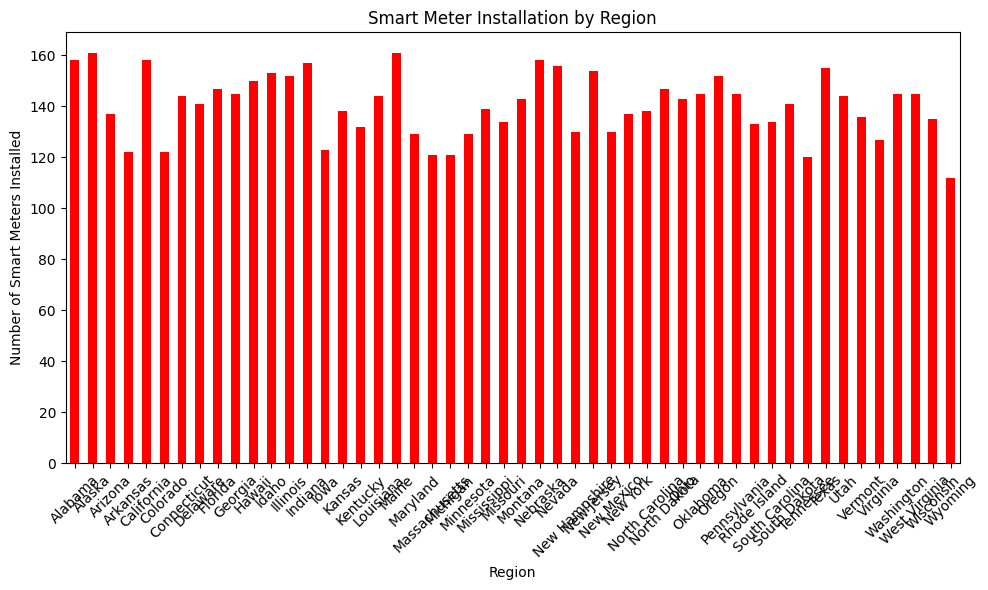

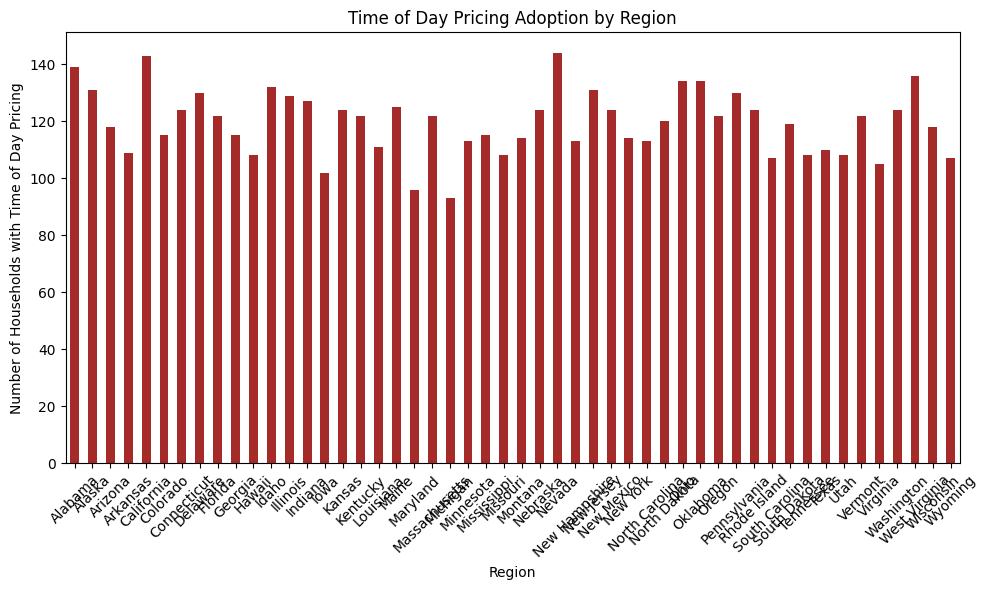


After Outlier Removal Shape: (10000, 15)

Data Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  int64  
 1   region                  10000 non-null  object 
 2   energy_consumption_kwh  10000 non-null  float64
 3   peak_hours_usage        10000 non-null  float64
 4   off_peak_usage          10000 non-null  float64
 5   renewable_energy_pct    10000 non-null  float64
 6   billing_amount          10000 non-null  float64
 7   household_size          10000 non-null  int64  
 8   temperature_avg         10000 non-null  float64
 9   income_bracket          10000 non-null  object 
 10  smart_meter_installed   10000 non-null  bool   
 11  time_of_day_pricing     10000 non-null  bool   
 12  annual_energy_trend     10000 non-null  float64
 13  solar_panel            

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# 2. Load the data
file_path = 'C:/Users/sayan/Downloads/Energy_dataset.csv'
df = pd.read_csv(file_path)

# 3. EDA: Visualize
print("\nInitial Data Info:")
df.info()

print("\nInitial Shape:", df.shape)

# Checking missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Additional Visualizations

# Histogram of all numerical features
plt.figure(figsize=(20, 15))
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Boxplot of Numerical Features')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.suptitle('Pairplot of Numerical Features')
plt.show()

# Heatmap to visualize correlation between features (excluding non-numerical columns)
plt.figure(figsize=(10, 6))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

# Total Energy Consumption by Region
plt.figure(figsize=(10, 6))
df.groupby('region')['energy_consumption_kwh'].sum().plot(kind='bar')
plt.title('Total Energy Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Total Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Renewable Energy Percentage by Region
plt.figure(figsize=(10, 6))
df.groupby('region')['renewable_energy_pct'].mean().plot(kind='bar', color='green')
plt.title('Average Renewable Energy Percentage by Region')
plt.xlabel('Region')
plt.ylabel('Average Renewable Energy Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Billing Amount by Income Bracket
plt.figure(figsize=(10, 6))
df.groupby('income_bracket')['billing_amount'].mean().plot(kind='bar', color='orange')
plt.title('Average Billing Amount by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Household Size Distribution
plt.figure(figsize=(10, 6))
df['household_size'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Household Size Distribution')
plt.xlabel('Household Size')
plt.ylabel('Number of Households')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Smart Meter Installation by Region
plt.figure(figsize=(10, 6))
df.groupby('region')['smart_meter_installed'].sum().plot(kind='bar', color='red')
plt.title('Smart Meter Installation by Region')
plt.xlabel('Region')
plt.ylabel('Number of Smart Meters Installed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time of Day Pricing Adoption by Region
plt.figure(figsize=(10, 6))
df.groupby('region')['time_of_day_pricing'].sum().plot(kind='bar', color='brown')
plt.title('Time of Day Pricing Adoption by Region')
plt.xlabel('Region')
plt.ylabel('Number of Households with Time of Day Pricing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Remove Outliers (using IQR method)
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

num_cols = df.select_dtypes(include=np.number).columns
df_clean = remove_outliers(df, num_cols)

print("\nAfter Outlier Removal Shape:", df_clean.shape)

# 5. Updated data info
print("\nData Info after cleaning:")
df_clean.info()

# 6. Features and Target
if 'Energy' in df_clean.columns:
    target = 'Energy'
else:
    target = df_clean.columns[-1]

X = df_clean.drop(columns=[target])
y = df_clean[target]

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# 7. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nInitial R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# 9. Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)

# Re-train best model
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate
best_pred = best_model.predict(X_test)
print("\nTuned R2 Score:", r2_score(y_test, best_pred))

# 10. Pipeline Building
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(**grid.best_params_, random_state=42))
])

pipe.fit(X_train, y_train)

# Save pipeline
joblib.dump(pipe, 'energy_model_pipeline.pkl')
print("\nModel saved as 'energy_model_pipeline.pkl'")

# 11. Unseen Data Check
# Simulate by taking random sample not seen before (optional real unseen data)
unseen_sample = X_test.sample(5, random_state=1)
true_values = y_test.loc[unseen_sample.index]
predicted_values = pipe.predict(unseen_sample)

comparison = pd.DataFrame({'True': true_values, 'Predicted': predicted_values})
print("\nUnseen Data Check:")
print(comparison)
